Importing the required PYPI modules:

In [1]:
import os
import keras
import numpy as np

Using TensorFlow backend.


Reading the input images of dogs:

In [2]:
dogs_image_path_01 = "C:\\Users\\amankhanna\\Documents\\amandeepsinghkhanna\\Kaggle Datasets\\cat-dog-classification\\training_set\\dogs"
dogs_image_path_02 = "C:\\Users\\amankhanna\\Documents\\amandeepsinghkhanna\\Kaggle Datasets\\cat-dog-classification\\test_set\\dogs"

dogs_image_names_01 = os.listdir(dogs_image_path_01)
dogs_image_names_02 = os.listdir(dogs_image_path_02)

dog_image_paths = []
for image_name in dogs_image_names_01:
    dog_image_paths.append(os.path.join(dogs_image_path_01, image_name))
for image_name in dogs_image_names_02:
    dog_image_paths.append(os.path.join(dogs_image_path_02, image_name))
print("Collected paths to {} images".format(len(dog_image_paths)))

dog_images = []
for image_path in dog_image_paths:
    image = keras.preprocessing.image.load_img(image_path, color_mode = "grayscale", target_size=(100, 100))
    image = keras.preprocessing.image.img_to_array(image)
    image = image/255.0
    dog_images.append(image)
dog_images = np.asarray(dog_images)
print("The shape of the matrix of images is - {}".format(dog_images.shape))

Collected paths to 5017 images
The shape of the matrix of images is - (5017, 100, 100, 1)


Defining the neural network:

In [31]:
def autoencoder_architecture(input_img):
    
    # ENCODER LAYER:
    x = keras.layers.Conv2D(128, (3, 3), activation ='relu', padding ='same')(input_img)
    x = keras.layers.MaxPooling2D((2, 2), padding ='same')(x) 
    x = keras.layers.Conv2D(64, (3, 3), activation ='relu', padding ='same')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding ='same')(x)
    x = keras.layers.Conv2D(16, (3, 3), activation ='relu', padding ='same')(x)
    encoded_layer = keras.layers.MaxPooling2D((2, 2), padding ='same')(x)
    
    # DECODER LAYER:
    x = keras.layers.Conv2D(16, (3, 3), activation ='relu', padding ='same')(encoded_layer)
    x = keras.layers.UpSampling2D((2, 2))(x)
    x = keras.layers.Conv2D(64, (3, 3), activation ='relu', padding ='same')(x)
    x = keras.layers.UpSampling2D((2, 2))(x)
    x = keras.layers.Conv2D(128, (3, 3), activation ='relu')(x)
    x = keras.layers.UpSampling2D((2, 2))(x)
    decoded_layer = keras.layers.Conv2D(1, (3, 3), activation ='sigmoid', padding ='same')(x)
    
    return decoded_layer

In [32]:
input_img=keras.layers.Input(shape=(100, 100, 1))

In [33]:
decoded_layer = autoencoder_architecture(input_img)

In [34]:
autoencoder = keras.models.Model(
    input_img, 
    decoded_layer
)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') # Auto-encoder compiler

In [35]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 100, 100, 128)     1280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 50, 50, 64)        73792     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 16)        9232      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0   

In [36]:
autoencoder.fit(
    dog_images, 
    dog_images,
    epochs = 5,
    batch_size = 50,
    shuffle = True,
    validation_split=0.3,
)

Train on 3511 samples, validate on 1506 samples
Epoch 1/6
3511/3511 [==============================] - 993s 283ms/step - loss: 0.6590 - val_loss: 0.6228
Epoch 2/6
3511/3511 [==============================] - 911s 260ms/step - loss: 0.6143 - val_loss: 0.6083
Epoch 3/6
3511/3511 [==============================] - 1029s 293ms/step - loss: 0.6044 - val_loss: 0.6029
Epoch 4/6
3511/3511 [==============================] - 11092s 3s/step - loss: 0.5988 - val_loss: 0.5944
Epoch 5/6
3511/3511 [==============================] - 923s 263ms/step - loss: 0.5960 - val_loss: 0.5912
Epoch 6/6
3511/3511 [==============================] - 1133s 323ms/step - loss: 0.5930 - val_loss: 0.5921


In [37]:
image = autoencoder.predict(np.asarray([dog_images[1]]))

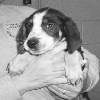

In [38]:
keras.preprocessing.image.array_to_img(dog_images[1])

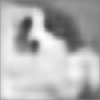

In [39]:
keras.preprocessing.image.array_to_img(image[0])